# Read Data

In [47]:
import pandas as pd
dt_train = pd.read_csv('train_data_restaurant.tsv', sep='\t')
dt_test = pd.read_csv('test_data_restaurant.tsv', sep='\t')

In [48]:
dt_train_2 = dt_train.rename({'Saya makan di sini dengan menggunakan voucher disdus. Paket nasi ayam kari, dengan diskon hingga 30 persen. Akibatnya para pengunjung mengantri untuk meredeem voucher. Cilakanya cek voucher masih dilakukan secara manual. Tidak ada masalah untuk makanannya, hanya saja antrian terlalu lama. Voucher sendiri sudah dibeli jadi mau tidak mau para pengunjung mengantri': 'Review', 'negative': 'Sentiment'}, axis=1)
dt_test_2 = dt_test.rename({'Tempatnya sih menarik, mudah dijangkau dari segala arah. menu yang disajikan cukup variatif dan ditata dengan rapih. Sebetulnya cukup nikmat, tapi tidak sesuai. List harga urtuk makanan, sama sekali tidak ada. Saya pilih sayur bunga pepaya (mungkin ditambah kata pedas.???) tapi yang disajikan malah lebih banyak cabenya daripada bunga pepaya.': 'Review', 'negative': 'Sentiment'}, axis=1)

In [49]:
pd.set_option('display.max_colwidth', -1)
dt_train_2.head()

Review  \
0  Mas indosat buat main game enemy has been slain susah bener mas tolong sinyalnya diperbaiki mas soalnya lelet nggak lelet kuotanya kesedot terus..                                                                                                                                                                                                                                                               
1  Trus sy percuma dong update no hp terbaru ke cs cab bni kalo data di bni masih no hp lama, gimana sih pelayanannya!                                                                                                                                                                                                                                                                                              
2  jika kita pilih dia maka akan ada lebih dari 300 kampung itu akan digusur.                                                                                                                                                                                                                                                                                                                                       
3  Dikarenakan adik saya suka dengan restoran ini, saya akhirnya mampir ke sini. Dari awal sih saya langsung tidak sreg sih. Makanan yang disediakan terlihat seperti yang tidak terlalu membangkitkan selera. Berbeda dengan restoran shabu yang biasa saya kunjungi. Dan setelah saya memilih dan mulai memasaknya, ternyata benar, rasanya pun tak masuk di lidah. Akhirnya banyak makanan yang tidak dimakan.   
4  Biasa2 saja g ada yg special, ayam gorengnya terlalu berminyak, makanan smua dingin cuma nasi nya yang panas, Harganya normal.                                                                                                                                                                                                                                                                                   

  Sentiment  
0  negative  
1  negative  
2  negative  
3  negative  
4  negative

In [50]:
dt_test_2.head()

Review  \
0  lokasi strategis penasaran karena daerah situ rame trus parkirannya, entah yg ke hdl atau ke alas daun ya rame2 sama keluarga rasa biasa aja, mahal iya, sayur seuprit tempatnya juga biasa aja yang beda cuma makan pake alas daun pisang.                                                                                                                                                                                                                              
1  Sesuai namanya, restoran ini unik dalam menyajikan makanannya, yaitu memakai piring beralas daun. Cara antri memilih makanannya juga unik, karena (calon) makanan dijejer, tamu bisa memilih dan nantinya akan dimasak kembali sampai matang. Makanan yang disajikan lebih seperti makanan rumahan Jawa / Sunda. Dari segi jenis makanan maupun rasa, tak ada yang istimewa.                                                                                             
2  Saya datang ketika petang dan hujan deras tempat parkir cukup luas ketika masuk kami dijamu dengan showcase pastry banyak small cake yang ditawarkan lalu masuk k restonya kurang nyaman agak kumuh mungkin sedang ada renovasi . dan kebanyakan staff dibanding tamu yang datang. makananpun kurang enak dibanding dengan yg dulu apa mungkin beda chefnya.                                                                                                             
3  Kalao mau ke sana jangan pas malem sih, soalnya bakal nyesel gak bisa liat pemandangan yg indah banget, aku pas kesana waktu itu malem jadi nyesel banget soalnya gak bisa liat pemandangan yg seru-seru, cuma liat lampu lampu aja:(                                                                                                                                                                                                                                    
4  Dilihat dari lokasinya yang berada di area highland, memang membuat tempat ini cocok untuk besantai dan menikmati pemandangan, juga terkesan romantis, terutama di malam hari dengan gemerlap cahaya dari city light of Bandung. Akan tetapi ditinjau dari kesigapan service, sangat mengecewakan. Saya dua kali berkunjung ke tempat ini dan harus menunggu lebih dari setengah jam untuk menikmati order saya. Mungkin akan mikir dua kali kalau harus ke sini lagi.   

  Sentiment  
0  negative  
1  negative  
2  negative  
3  negative  
4  negative

# Preprocessing

In [5]:
Review = dt_train_2['Review'].tolist()

In [6]:
Review_test = dt_test_2['Review'].tolist()

In [7]:
import re, string
from nltk.tokenize import word_tokenize
regex = re.compile('[%s]' % re.escape(string.punctuation))

def casefolding(s):
    new_str = s.lower()  
    return new_str

def remove_punctuation(s):  # From Vinko's solution, with fix.
    return regex.sub(' ', s)

def remove_digit_number(text):
    """ Remove all digit number in text. """
    return re.sub(r'[^a-z ]*([.0-9])*\d', '', text)

def remove_repeated_character(str):
    str = re.sub(r'(.)\1{2,}', r'\1', str)
    
    return str

def normalize_slang_word(str):
    text_list = str.split(' ')
    slang_words_raw = pd.read_csv('slang_word_list.csv', sep=',', header=None)
    slang_word_dict = {}
    
    for item in slang_words_raw.values:
        slang_word_dict[item[0]] = item[1]
        
        for index in range(len(text_list)):
            if text_list[index] in slang_word_dict.keys():
                text_list[index] = slang_word_dict[text_list[index]]
    
    return ' '.join(text_list) 

def remove_unused_character(text):
    """ Remove characters that are more than two characters. """
    text_list = text.split(' ')
    text_list_temp = []

    for index in range(len(text_list)):
        if len(text_list[index]) > 2:
            text_list_temp.append(text_list[index])

    return ' '.join(text_list_temp)

def remove_extra_spaces(text):
        """ Make extra spaces into only one space. """
        text_list = text.split(' ')
        text_list_temp = []

        for word in text_list:
            if word.strip():
                text_list_temp.append(word.strip())

        return ' '.join(text_list_temp)
    
def join_negation(text):
    """  Join negation word with delimiter. """
    text_list = text.split(' ')

    for index in range(len(text_list)):
        if (text_list[index] == 'tidak' or text_list[index] == 'kurang'):
            if index < len(text_list) - 1:
                text_list[index] = text_list[index] + "_" + text_list[index + 1]
                text_list[index + 1] = ''
            else:
                text_list[index] = ''

    return ' '.join(text_list)

Stopwords

In [8]:
stopwords = ["dengan", "ia", "aja", "nih", "bahwa","oleh", "pernah", "dan", "untuk", "yang", "dengan", "sangat", "banyak", "dari", 
            "kita", "saya", "juga", "bisa", "karena", "kalau", "tapi", "akan", "sudah", "kami", "adalah", 
            "anda", "lagi", "buat", "salah", "sampai", "dapat", "dalam", "lebih", "pada", "sekali", "atau", "masih", 
            "jika", "apa", "beberapa", "menjadi", "tetap", "saja", "terdapat", "boleh", "begitu", "hanya", "paling", 
            "sehingga", "jadi", "sambil", "harus", "memang", "setiap", "selalu", "berada", "kamu", "sebagai", "bagi", 
            "sana", "lain", "setelah", "semua", "seperti", "dulu", "dahulu", "ketika", "terlalu", "mungkin", "namun", 
            "hingga", "ada", "bila", "agak",  "tersebut", "sebuah", "selain", "sungguh", "bahkan", "tetapi", "apalagi", 
            "belum", "telah", "terus", "meskipun", "lalu", "sama", "agar", "pula", "secara", "selama", "tiap", "bagian", 
            "meski", "yaitu",  "serta", "seorang", "orang", "walaupun", "tertentu", "maka", "seolah", "cuma", "sang", 
            "alhamdulillah", "seakan", "bakal", "sekaligus", "kebanyakan", "sebelum", "senantiasa", "adanya", "saat",
            "itulah", "tadi", "terkait", "begitulah", "kira", "ke", "di", "nya", "antara", "ialah", "ya", 
            "ini", "itu", "dong", "sih", "mas", "mba", "mbak", "sich", "pun", "akhirnya", "kok", "lo", "loh"]

def F_Stopword(text_list):
    text = text_list.split(' ')
    for index in range(len(text)):
        if (text[index] in stopwords):
            text[index] = ''
        else:
            text[index] = text[index]
    return ' '.join(text)

Stemming

In [9]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def F_Stemming (text):
    temp = stemmer.stem(text)
    return temp

In [10]:
def Preprocess(list):
    result = []
    for rev in list:
        rp = remove_extra_spaces(
            join_negation(
                F_Stemming(
                    F_Stopword(
                        remove_extra_spaces(
                            remove_unused_character(
                                normalize_slang_word(
                                    remove_repeated_character(
                                        remove_digit_number(
                                            remove_punctuation(
                                                casefolding(rev)))))))))))
        result.append(rp)
    return result

In [11]:
#data train
dt_train_2["Review_Preprocessed"] = Preprocess(Review)

#data test
dt_test_2["Review_Preprocessed"] = Preprocess(Review_test)

In [13]:
dt_train_2.head()

Review  \
0  Mas indosat buat main game enemy has been slain susah bener mas tolong sinyalnya diperbaiki mas soalnya lelet nggak lelet kuotanya kesedot terus..                                                                                                                                                                                                                                                               
1  Trus sy percuma dong update no hp terbaru ke cs cab bni kalo data di bni masih no hp lama, gimana sih pelayanannya!                                                                                                                                                                                                                                                                                              
2  jika kita pilih dia maka akan ada lebih dari 300 kampung itu akan digusur.                                                                                                                                                                                                                                                                                                                                       
3  Dikarenakan adik saya suka dengan restoran ini, saya akhirnya mampir ke sini. Dari awal sih saya langsung tidak sreg sih. Makanan yang disediakan terlihat seperti yang tidak terlalu membangkitkan selera. Berbeda dengan restoran shabu yang biasa saya kunjungi. Dan setelah saya memilih dan mulai memasaknya, ternyata benar, rasanya pun tak masuk di lidah. Akhirnya banyak makanan yang tidak dimakan.   
4  Biasa2 saja g ada yg special, ayam gorengnya terlalu berminyak, makanan smua dingin cuma nasi nya yang panas, Harganya normal.                                                                                                                                                                                                                                                                                   

  Sentiment  \
0  negative   
1  negative   
2  negative   
3  negative   
4  negative   

                                                                                                                                                                                              Review_Preprocessed  
0  indosat main game enemy has been slain susah benar tolong sinyal baik soal lambat tidak_lambat kuota sedot                                                                                                      
1  percuma update nomor baru cabang bni data bni nomor lama bagaimana layan                                                                                                                                        
2  pilih dia kampung gusur                                                                                                                                                                                         
3  karena adik suka restoran mampir sini awal langsung tidak_sreg makan sedia lihat tidak_bangkit selera beda restoran shabu biasa kunjung pilih mulai masak nyata benar rasa tidak_masuk lidah makan tidak_makan  
4  biasa tidak_special ayam goreng minyak makan dingin nasi panas harga normal

In [14]:
dt_test_2.head()

Review  \
0  lokasi strategis penasaran karena daerah situ rame trus parkirannya, entah yg ke hdl atau ke alas daun ya rame2 sama keluarga rasa biasa aja, mahal iya, sayur seuprit tempatnya juga biasa aja yang beda cuma makan pake alas daun pisang.                                                                                                                                                                                                                              
1  Sesuai namanya, restoran ini unik dalam menyajikan makanannya, yaitu memakai piring beralas daun. Cara antri memilih makanannya juga unik, karena (calon) makanan dijejer, tamu bisa memilih dan nantinya akan dimasak kembali sampai matang. Makanan yang disajikan lebih seperti makanan rumahan Jawa / Sunda. Dari segi jenis makanan maupun rasa, tak ada yang istimewa.                                                                                             
2  Saya datang ketika petang dan hujan deras tempat parkir cukup luas ketika masuk kami dijamu dengan showcase pastry banyak small cake yang ditawarkan lalu masuk k restonya kurang nyaman agak kumuh mungkin sedang ada renovasi . dan kebanyakan staff dibanding tamu yang datang. makananpun kurang enak dibanding dengan yg dulu apa mungkin beda chefnya.                                                                                                             
3  Kalao mau ke sana jangan pas malem sih, soalnya bakal nyesel gak bisa liat pemandangan yg indah banget, aku pas kesana waktu itu malem jadi nyesel banget soalnya gak bisa liat pemandangan yg seru-seru, cuma liat lampu lampu aja:(                                                                                                                                                                                                                                    
4  Dilihat dari lokasinya yang berada di area highland, memang membuat tempat ini cocok untuk besantai dan menikmati pemandangan, juga terkesan romantis, terutama di malam hari dengan gemerlap cahaya dari city light of Bandung. Akan tetapi ditinjau dari kesigapan service, sangat mengecewakan. Saya dua kali berkunjung ke tempat ini dan harus menunggu lebih dari setengah jam untuk menikmati order saya. Mungkin akan mikir dua kali kalau harus ke sini lagi.   

  Sentiment  \
0  negative   
1  negative   
2  negative   
3  negative   
4  negative   

                                                                                                                                                                                                                            Review_Preprocessed  
0  lokasi strategis penasaran daerah situ ramai parkir entah hdl alas daun iya ramai keluarga rasa biasa mahal iya sayur seuprit tempat biasa beda makan pakai alas daun pisang                                                                  
1  sesuai nama restoran unik saji makan pakai piring alas daun cara antri pilih makan unik calon makan jejer tamu pilih nanti masak kembali matang makan saji makan rumah jawa sunda segi jenis makan maupun rasa tidak_istimewa                 
2  datang petang hujan deras tempat parkir cukup luas masuk jamu showcase pastry small cake tawar masuk restonya kurang_nyaman kumuh sedang renovasi staff banding tamu datang makan kurang_enak banding beda chefnya                            
3  kalao mau jangan pas malam soal nyesel tidak_lihat pandang indah banget aku pas kesana waktu malam nyesel banget soal tidak_lihat pandang seru seru lihat lampu lampu                                                                         
4  lihat lokasi area highland buat tempat cocok besantai nikmat pandang kes romantis utama malam hari gemerlap cahaya city light bandung tinjau sigap service kecewa dua kali kunjung tempat tunggu tengah jam nikmat order mikir dua kali sini

Preprocessed result saved as a csv file

In [12]:
# import pandas as pd
dt_train_2 = pd.read_csv('train_preprocessed.csv')
dt_test_2 = pd.read_csv('test_preprocessed.csv')

# Data Count

Total Data : 1779
Positive : 1200
Negative : 579


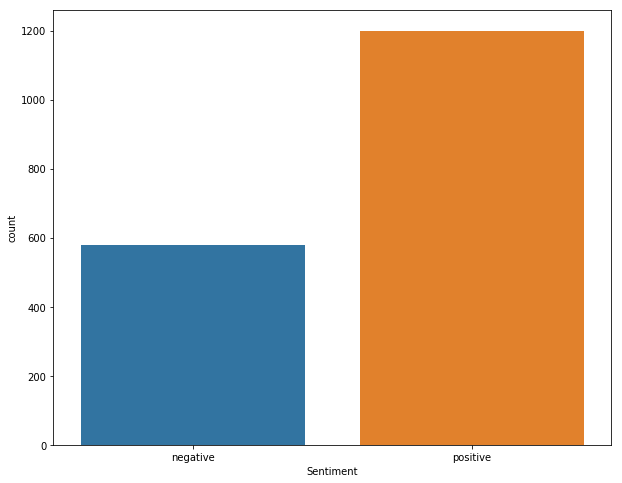

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dt_train_2.replace('', np.nan, inplace=True)
dt_train_2.dropna(inplace=True) # making sure no row is null
positive = dt_train_2.loc[dt_train_2['Sentiment'] == 'positive'].copy().reset_index(drop=True)
negative = dt_train_2.loc[dt_train_2['Sentiment'] == 'negative'].copy().reset_index(drop=True)
print("Total Data :", len(dt_train_2))
print("Positive :", len(positive))
print("Negative :", len(negative))

plt.figure(figsize=(10,8))
sns.countplot(x='Sentiment', data=dt_train_2)
plt.show()

# Oversampling

Random over-sampling:
positive    1200
negative    1200
Name: Sentiment, dtype: int64


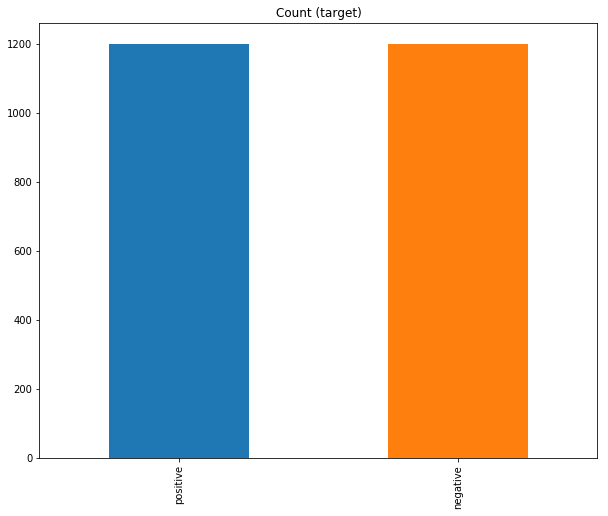

In [17]:
count_class_positive, count_class_negative= dt_train_2.Sentiment.value_counts()

rev_count_class_positive = dt_train_2[dt_train_2['Sentiment'] == "positive"]
rev_count_class_negative = dt_train_2[dt_train_2['Sentiment'] == "negative"]

ov_sentiment_positive = rev_count_class_positive.sample(count_class_positive, replace=True)
ov_sentiment_negative = rev_count_class_negative.sample(count_class_positive, replace=True)
dt_train_2_os = pd.concat([ov_sentiment_positive, ov_sentiment_negative], axis=0)

print('Random over-sampling:')
print(dt_train_2_os.Sentiment.value_counts())

plt.figure(figsize=(10,8))
dt_train_2_os.Sentiment.value_counts().plot(kind='bar', title='Count (target)');

In [18]:
dt_train_2_os.head()

Review  \
818   Semua makanan minumannya enak, lengkap dengan sayur. Ada yang paket hemat dibawah 20 ribu untuk ayam potong sampai 30 ribuan untuk yang bebek/ayam kampung. Rasa rumahan. Enak sambil lihat kendaraan berlalu.                                                 
866   Ayam penyet nya enak, porsi bisa lebih banyak. Untuk pesen 1 ayam penyet saya masih merasa kurang. Sambal kemanggi nua enak, pedas nya pas. Sambil di temani Live music dengan berbagai genre, dangdut juga ada.                                               
1587  kalo ga punya uang buat beli komik tapi juga pingin nongkrong. Dateng aja kesini. Koleksi komiknya lengkap. Makanan minumannya sebenrnya hanya "fixture" tambahan, tapi cukup lumayan. Harganya juga murah khas mahasiswa.                                     
970   Gokana Teppan merupakan restoran yang menyajikan menu masakan Jepang. Saya mencoba menu paket spesial 5 dan menurut Saya rasanya biasa saja dengan harga menengah. Tersedia welcoming kerupuk, tempatnya besar, baik buat keluarga dan kelompok besar.         
1308  Bakmie aloi merupakan favorite anak saya. apalagi bakmi casiu (non halal) rasa mie yang khas dan tempat makan yang lumayan nyaman dan bersih. Harga mie juga tidak mahal .rata rata satu porai tidak sampai 20.000 rupiah.cukup murah dibanding kualitasnya.   

     Sentiment  \
818   positive   
866   positive   
1587  positive   
970   positive   
1308  positive   

                                                                                                                                                                            Review_Preprocessed  
818   makan minum enak lengkap sayur paket hemat bawah ribu ayam potong ribu bebek ayam kampung rasa rumah enak lihat kendara lalu                                                               
866   ayam penyet enak porsi pesan ayam penyet rasa kurang_sambal kemanggi nua enak pedas pas teman live music bagai genre dangdut                                                               
1587  tidak_punya uang beli komik ingin kumpul datang kesini koleksi komik lengkap makan minum sebenrnya fixture tambah cukup lumayan harga murah khas mahasiswa                                 
970   gokana teppan rupa restoran saji menu masakan jepang coba menu paket spesial turut rasa biasa harga tengah sedia welcoming kerupuk tempat besar baik keluarga kelompok besar               
1308  bakmie aloi rupa favorite anak bakmi casiu non halal rasa mie khas tempat makan lumayan nyaman bersih harga mie tidak_mahal rata rata satu pora tidak_rupiah cukup murah banding kualitas

# Prepare Model

In [19]:
from tensorflow.keras import initializers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, LSTM, GRU
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils as np_utils
from nltk.tokenize import sent_tokenize
from termcolor import colored
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

C:\Users\ROYAN\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [20]:
data_train = dt_train_2_os['Review_Preprocessed'].tolist()
sent_train = dt_train_2_os['Sentiment'].tolist()

data_test = dt_test_2['Review_Preprocessed'].tolist()
sent_test = dt_test_2['Sentiment'].tolist()

In [21]:
import numpy as np

print(np.shape(data_train), np.shape(sent_train))
print(np.shape(data_test), np.shape(sent_test))

(2400,) (2400,)
(184,) (184,)


In [22]:
data_train, data_val, sent_train, sent_val = train_test_split(data_train, sent_train, test_size= 0.33, random_state=42)

In [23]:
Total_Review = data_train + data_val + data_test

In [24]:
# Tokenizer
tokenizer = Tokenizer(oov_token = True)
tokenizer.fit_on_texts(Total_Review)

vocab = max([len(tokenizer.word_index)]) + 1 
maxlen = max([len(i.split()) for i in Total_Review]) 
batch_size = 64
num_epochs = 10 
initializer = initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=2) # mengatur angka random weight

In [25]:
from sklearn.preprocessing import LabelEncoder
# encoding the levels of categorical features into numeric values
labelencoder_Y_train = LabelEncoder()
Y_train = labelencoder_Y_train.fit_transform(sent_train)

In [26]:
# Data Train
X_train = tokenizer.texts_to_sequences(data_train)
X_train = pad_sequences(X_train, maxlen=maxlen)
Y_train = np_utils.to_categorical(Y_train, num_classes= 2)

In [27]:
# encoding the levels of categorical features into numeric values
labelencoder_Y_val = LabelEncoder()
Y_val = labelencoder_Y_val.fit_transform(sent_val)

In [28]:
# Data Val
X_val = tokenizer.texts_to_sequences(data_val)
X_val = pad_sequences(X_val, maxlen=maxlen)
Y_val = np_utils.to_categorical(Y_val, num_classes = 2)

In [29]:
# encoding the levels of categorical features into numeric values
labelencoder_Y_test = LabelEncoder()
Y_test = labelencoder_Y_test.fit_transform(sent_test)

In [30]:
# Data Test
X_test = tokenizer.texts_to_sequences(data_test)
X_test = pad_sequences(X_test, maxlen=maxlen)
Y_test = np_utils.to_categorical(Y_test, num_classes = 2)

In [31]:
def get_model(X, Y, dropout):
    model = Sequential() 
    model.add(Embedding(input_dim = vocab, output_dim = 32, input_length = maxlen, embeddings_initializer = initializer))
    model.add(Dropout(dropout))
    model.add(GRU(64, recurrent_initializer = initializer, kernel_initializer = initializer))
    model.add(Dropout(dropout))
    model.add(Dense(2, activation='sigmoid', kernel_initializer = initializer)) 
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    
    return model

def get_model2(X, Y):
    model = Sequential() 
    model.add(Embedding(input_dim = vocab, output_dim = 32, input_length = maxlen, embeddings_initializer = initializer))
    model.add(GRU(64, recurrent_initializer = initializer, kernel_initializer = initializer))
    model.add(Dense(2, activation='sigmoid', kernel_initializer = initializer)) 
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    
    return model

def evaluate(model, X, Y):
    predicted = model.predict_classes(X)
    decode = np.argmax(Y, axis=1)
    print('Accuracy:', accuracy_score(predicted, decode))
    print('F1 score:', f1_score(predicted, decode, average='macro'))
    print('Recall:', recall_score(predicted, decode, average='macro'))
    print('Precision:', precision_score(predicted, decode, average='macro'))
        
def conf_matrix(model, X, Y):
    predicted = model.predict_classes(X)
    decode = np.argmax(Y, axis=1)
    lab = ["negative", "positive"]
    
    confusion_mtx = confusion_matrix(predicted, decode)
    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_mtx, annot=True, fmt="d", xticklabels=lab, yticklabels=lab)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

# Model 1

batch size = 64, Output_Dim = 32, GRU unit = 64 with dropout = 0.5

In [32]:
model1 = get_model(X_train, Y_train, 0.5)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 51, 32)            134528    
_________________________________________________________________
dropout (Dropout)            (None, 51, 32)            0         
_________________________________________________________________
gru (GRU)                    (None, 64)                18624     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 130       
Total params: 153,282
Trainable params: 153,282
Non-trainable params: 0
_______________

In [34]:
history1 = model1.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(X_val, Y_val))

Train on 1608 samples, validate on 792 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
1608/1608 [==============================] - 4s 2ms/sample - loss: 0.6930 - acc: 0.5093 - val_loss: 0.6924 - val_acc: 0.5518
Epoch 2/10
1608/1608 [==============================] - 2s 1ms/sample - loss: 0.6852 - acc: 0.6912 - val_loss: 0.6376 - val_acc: 0.8100
Epoch 3/10
1608/1608 [==============================] - 2s 1ms/sample - loss: 0.5048 - acc: 0.7830 - val_loss: 0.4274 - val_acc: 0.7961
Epoch 4/10
1608/1608 [==============================] - 2s 2ms/sample - loss: 0.2894 - acc: 0.9011 - val_loss: 0.2635 - val_acc: 0.9280
Epoch 5/10
1608/1608 [==============================] - 2s 1ms/sample - loss: 0.1891 - acc: 0.9397 - val_loss: 0.1854 - val_acc: 0.9470
Epoch 6/10
1608/1608 [==============================] - 2s 1ms/sample - loss: 0.1391 - acc: 0.9621 - val_loss: 0.1891 - val_acc: 0.9268
Epoch 7/10
1608/1608 [==============================] - 3s 2ms/sample - loss: 0.0939 - ac

# Evaluation 1

In [35]:
accr = model1.evaluate(X_val, Y_val)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

792/792 [==============================] - 0s 436us/sample - loss: 0.1893 - acc: 0.9394
Test set
  Loss: 0.189
  Accuracy: 0.939


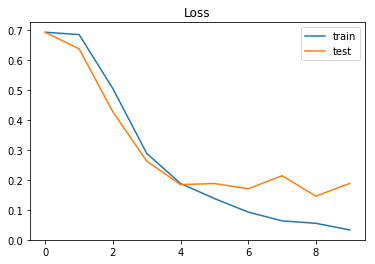

In [36]:
plt.title('Loss')
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')
plt.legend()
plt.show();

Accuracy: 0.842391304347826
F1 score: 0.8256607965498088
Recall: 0.8269054178145088
Precision: 0.8244791666666667


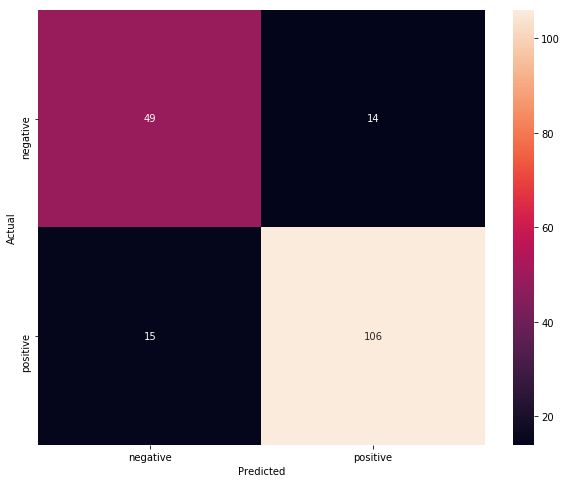

In [37]:
#evaluate test data
evaluate(model1, X_test, Y_test)
conf_matrix(model1, X_test, Y_test)

fixed model saved as h5 model

In [38]:
from tensorflow.keras.models import load_model

# model1.save('fixed_model.h5')
# model1 = load_model('fixed_model.h5')

# Model 2

batch size = 64, Output_Dim = 32, GRU unit = 64 without dropout

In [39]:
model2 = get_model2(X_train, Y_train)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 51, 32)            134528    
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                18624     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 153,282
Trainable params: 153,282
Non-trainable params: 0
_________________________________________________________________
None


In [40]:
history2 = model2.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(X_val, Y_val))

Train on 1608 samples, validate on 792 samples
Epoch 1/10
1608/1608 [==============================] - 3s 2ms/sample - loss: 0.6928 - acc: 0.6160 - val_loss: 0.6907 - val_acc: 0.7904
Epoch 2/10
1608/1608 [==============================] - 2s 1ms/sample - loss: 0.6452 - acc: 0.8038 - val_loss: 0.5079 - val_acc: 0.8068
Epoch 3/10
1608/1608 [==============================] - 2s 1ms/sample - loss: 0.3943 - acc: 0.8710 - val_loss: 0.3031 - val_acc: 0.9028
Epoch 4/10
1608/1608 [==============================] - 2s 1ms/sample - loss: 0.2071 - acc: 0.9415 - val_loss: 0.2165 - val_acc: 0.9280
Epoch 5/10
1608/1608 [==============================] - 2s 1ms/sample - loss: 0.1900 - acc: 0.9484 - val_loss: 0.1833 - val_acc: 0.9343
Epoch 6/10
1608/1608 [==============================] - 2s 1ms/sample - loss: 0.1021 - acc: 0.9701 - val_loss: 0.1527 - val_acc: 0.9432
Epoch 7/10
1608/1608 [==============================] - 2s 1ms/sample - loss: 0.0623 - acc: 0.9845 - val_loss: 0.1639 - val_acc: 0.9470
E

# Evaluation 2

In [41]:
accr = model2.evaluate(X_val, Y_val)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

792/792 [==============================] - 0s 467us/sample - loss: 0.1772 - acc: 0.9444
Test set
  Loss: 0.177
  Accuracy: 0.944


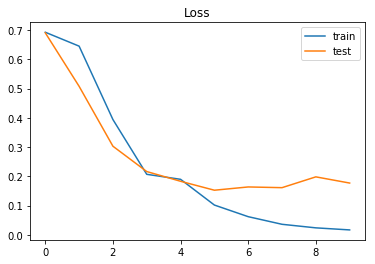

In [42]:
plt.title('Loss')
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.show();

Accuracy: 0.8097826086956522
F1 score: 0.7976815054506614
Recall: 0.7916207951070336
Precision: 0.8104166666666667


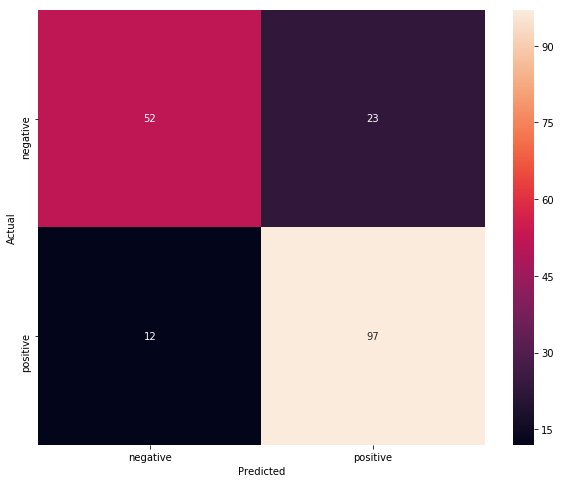

In [43]:
#evaluate test data
evaluate(model2, X_test, Y_test)
conf_matrix(model2, X_test, Y_test)

# Predict Demonstration

model 1 gets better result

In [44]:
def predict_sentiment(text):
    res = tokenizer.texts_to_sequences([text])
    padding = pad_sequences(res, maxlen=maxlen)
    result = labelencoder_Y_test.inverse_transform([model1.predict_classes(padding)])
    return result

In [45]:
word = ["saya sangat menyukai tempat ini, sangat menyenangkan, banyak mainan dan spot untuk berfoto", 
        "di sini tempat kotor dan ramai sekali, kemungkinan saya tidak mau berkunjung lagi ke sini",
        "pelayan sangat ramah dan memberikan pelayanan yang baik",
        "terlalu lama menunggu, pelayanannya buruk sekali"]
for w in word:
    if (predict_sentiment(w)[0] == "positive"):
        print(colored(w + " (" + predict_sentiment(w)[0] + ")", 'green'))
    else:
        print(colored(w + " (" + predict_sentiment(w)[0] + ")", 'red'))

saya sangat menyukai tempat ini, sangat menyenangkan, banyak mainan dan spot untuk berfoto (positive)
di sini tempat kotor dan ramai sekali, kemungkinan saya tidak mau berkunjung lagi ke sini (negative)
pelayan sangat ramah dan memberikan pelayanan yang baik (positive)
terlalu lama menunggu, pelayanannya buruk sekali (negative)


C:\Users\ROYAN\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ROYAN\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ROYAN\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ROYAN\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_